In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from tensorflow.keras.layers import Dense,Activation,Dropout
from tensorflow.keras.optimizers import Adam

In [ ]:
data = pd.read_csv('/content/Admission_Predict (1).csv')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [ ]:
data.isnull().any()

Serial No.           False
GRE Score            False
TOEFL Score          False
University Rating    False
SOP                  False
LOR                  False
CGPA                 False
Research             False
Chance of Admit      False
dtype: bool

In [ ]:
data=data.rename(columns = {'Chance of Admit ':'Chance of Admit'})

In [ ]:
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


<ipython-input-7-64e93544a305>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['GRE Score'])


<Axes: xlabel='GRE Score', ylabel='Density'>

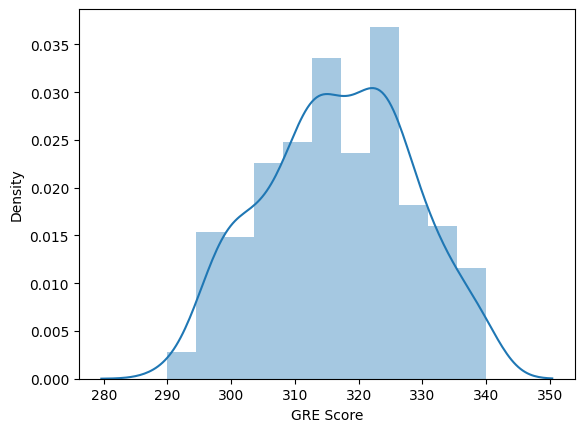

In [ ]:
sns.distplot(data['GRE Score'])

<Axes: >

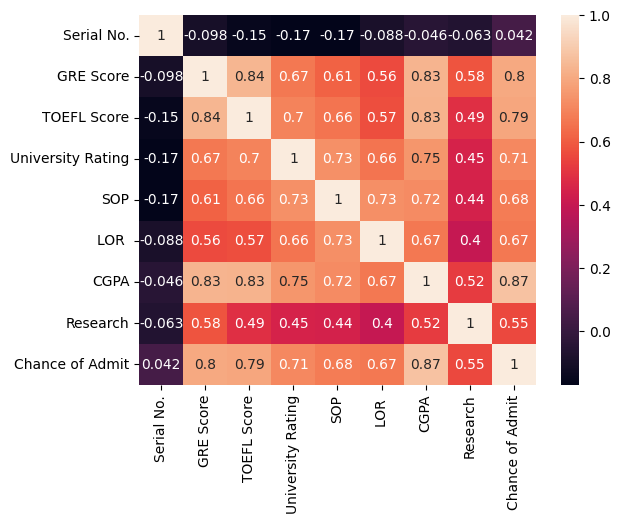

In [ ]:
sns.heatmap(data.corr(), annot=True)

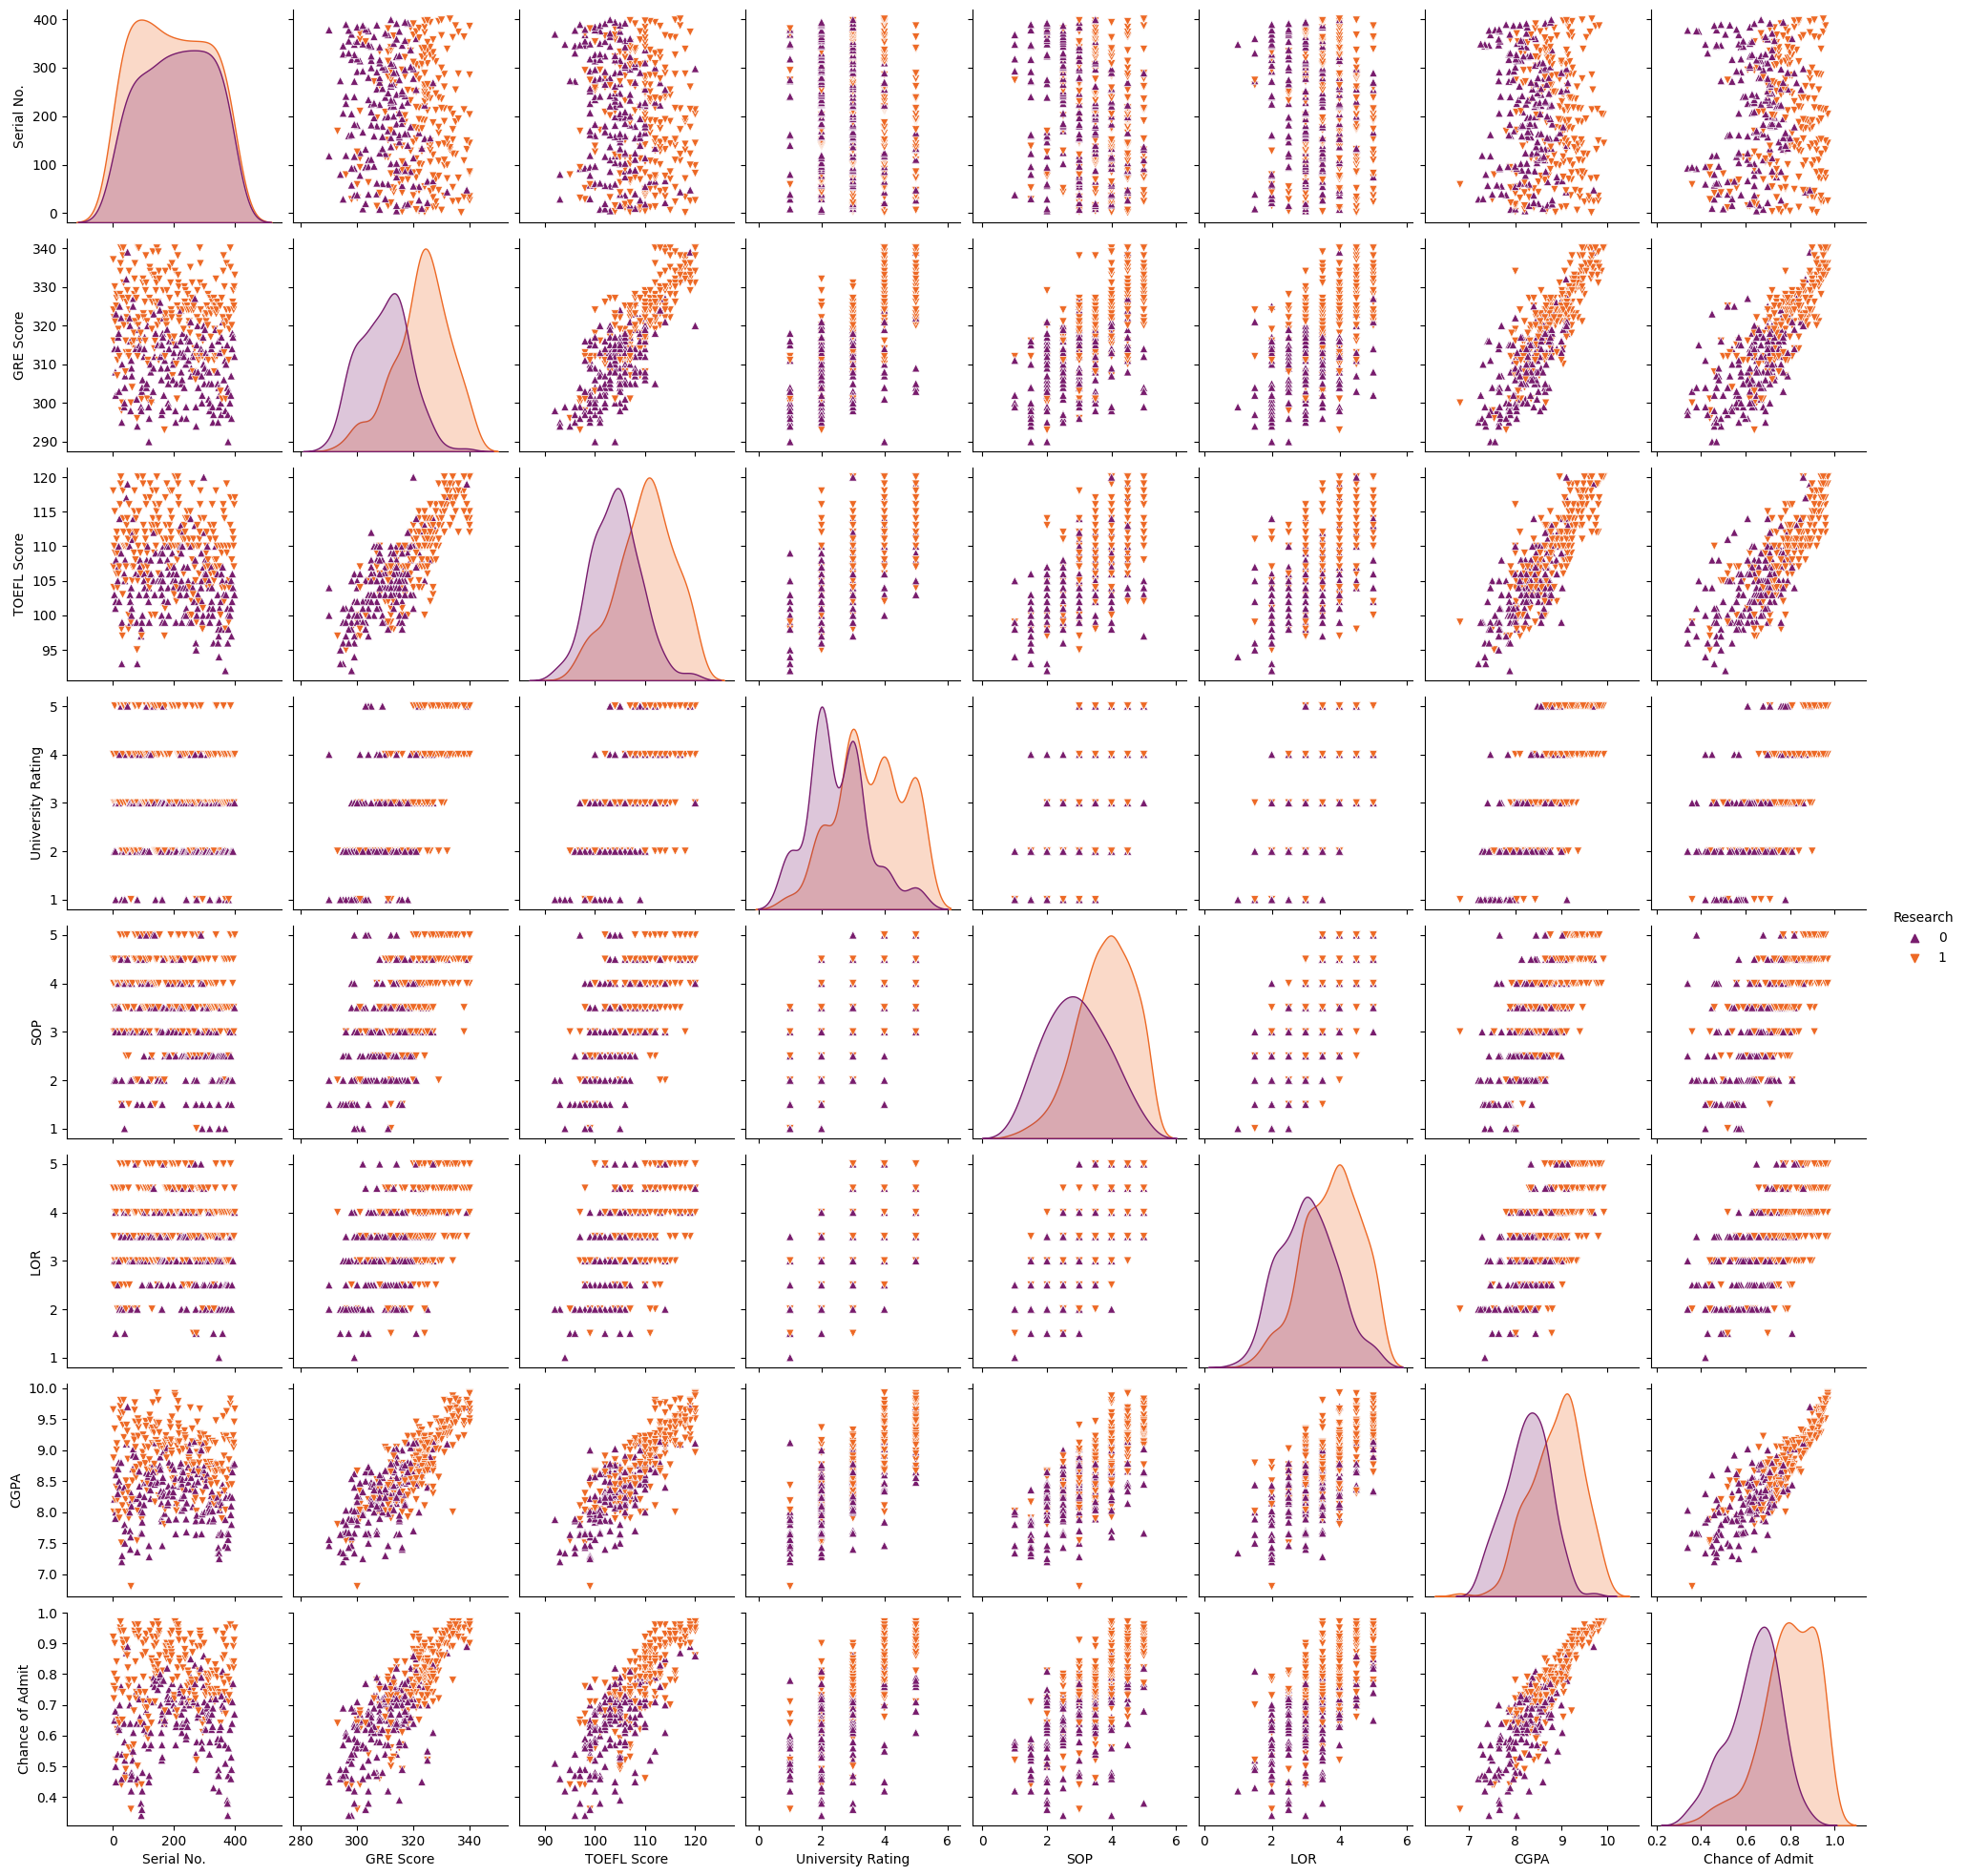

In [ ]:
sns.pairplot(data=data,hue='Research',markers=["^","v"],palette='inferno')

<Axes: xlabel='University Rating', ylabel='CGPA'>

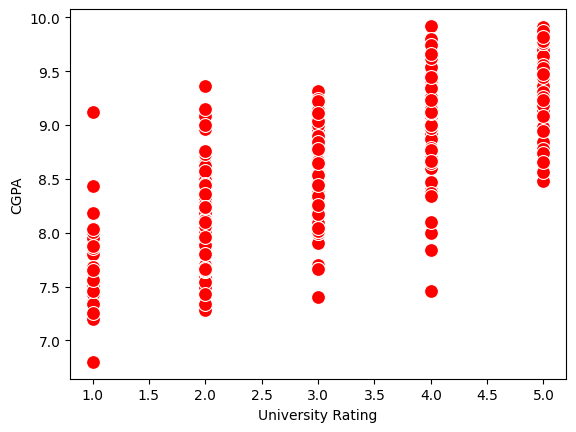

In [ ]:
sns.scatterplot(x='University Rating',y='CGPA',data=data,color='Red', s=100)

IndexError: ignored

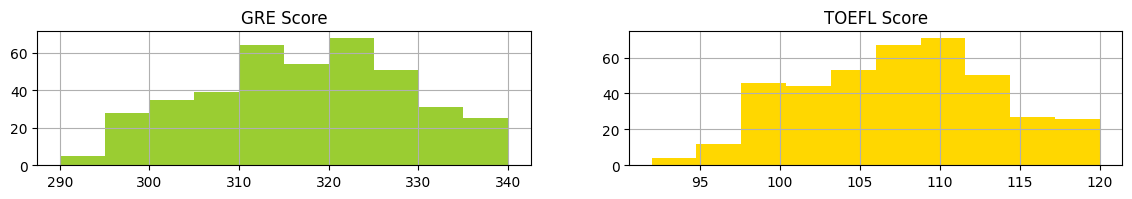

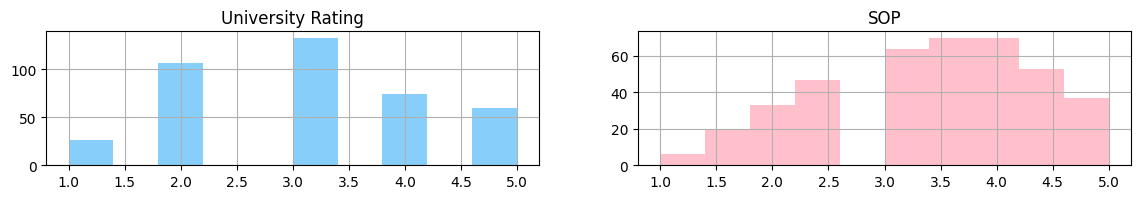

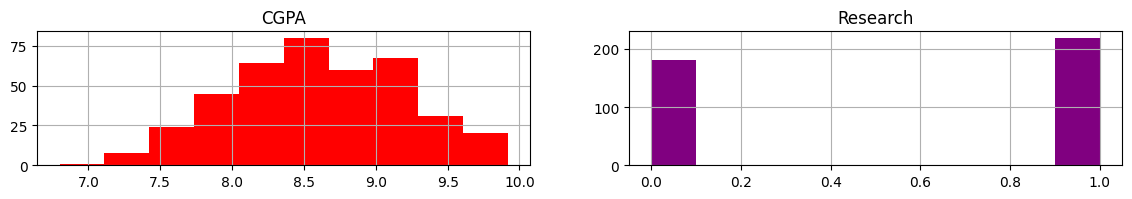

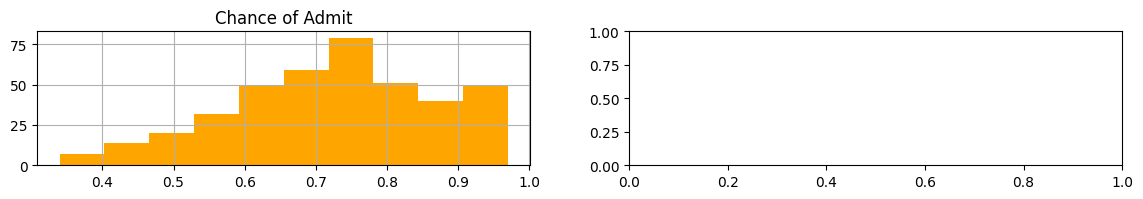

In [ ]:
category = ['GRE Score','TOEFL Score','University Rating','SOP','CGPA','Research','Chance of Admit']
color = ['yellowgreen','gold','lightskyblue','pink','red','purple','orange','gray']
start = True
for i in np.arange(4):
    fig = plt.figure(figsize=(14,8))
    plt.subplot2grid((4,2),(i,0))
    data[category[2*i]].hist(color=color[2*i],bins=10)
    plt.title(category[2*i])
    plt.subplot2grid((4,2),(i,1))
    data[category[2*i+1]].hist(color=color[2*i+1],bins=10)
    plt.title(category[2*i+1])

plt.subplots_adjust(hspace = 0.7, wspace = 0.2)
plt.show()

In [ ]:
x=data.iloc[:,0:7].values
x

array([[  1.  , 337.  , 118.  , ...,   4.5 ,   4.5 ,   9.65],
       [  2.  , 324.  , 107.  , ...,   4.  ,   4.5 ,   8.87],
       [  3.  , 316.  , 104.  , ...,   3.  ,   3.5 ,   8.  ],
       ...,
       [398.  , 330.  , 116.  , ...,   5.  ,   4.5 ,   9.45],
       [399.  , 312.  , 103.  , ...,   3.5 ,   4.  ,   8.78],
       [400.  , 333.  , 117.  , ...,   5.  ,   4.  ,   9.66]])

In [ ]:
y=data.iloc[:,7:].values
y

array([[1.  , 0.92],
       [1.  , 0.76],
       [1.  , 0.72],
       [1.  , 0.8 ],
       [0.  , 0.65],
       [1.  , 0.9 ],
       [1.  , 0.75],
       [0.  , 0.68],
       [0.  , 0.5 ],
       [0.  , 0.45],
       [1.  , 0.52],
       [1.  , 0.84],
       [1.  , 0.78],
       [1.  , 0.62],
       [1.  , 0.61],
       [0.  , 0.54],
       [0.  , 0.66],
       [1.  , 0.65],
       [0.  , 0.63],
       [0.  , 0.62],
       [1.  , 0.64],
       [0.  , 0.7 ],
       [1.  , 0.94],
       [1.  , 0.95],
       [1.  , 0.97],
       [1.  , 0.94],
       [0.  , 0.76],
       [1.  , 0.44],
       [0.  , 0.46],
       [0.  , 0.54],
       [1.  , 0.65],
       [1.  , 0.74],
       [1.  , 0.91],
       [1.  , 0.9 ],
       [1.  , 0.94],
       [1.  , 0.88],
       [0.  , 0.64],
       [0.  , 0.58],
       [0.  , 0.52],
       [0.  , 0.48],
       [1.  , 0.46],
       [1.  , 0.49],
       [1.  , 0.53],
       [0.  , 0.87],
       [1.  , 0.91],
       [1.  , 0.88],
       [1.  , 0.86],
       [0.  ,

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.30,random_state=101)

In [ ]:
y_train=(y_train>0.5)
y_train

array([[ True,  True],
       [False,  True],
       [ True,  True],
       [ True,  True],
       [ True, False],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [False,  True],
       [ True,  True],
       [ True,  True],
       [False,  True],
       [ True,  True],
       [ True,  True],
       [False,  True],
       [False, False],
       [ True, False],
       [False,  True],
       [ True,  True],
       [False,  True],
       [False, False],
       [False,  True],
       [False,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [False,  True],
       [False,  True],
       [ True,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [ True,  True],
       [ True,  True],
       [False,  True],
       [ True,  True],
       [False,  True],
       [False,  True],
       [ True,  True],
       [ True,  True],
       [Fal

In [ ]:
y_test=(y_test>0.5)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [ ]:
m = LinearRegression()
m.fit(x_train, y_train)
y_pred = m.predict(x_test)

In [ ]:
r2_score(y_test, y_pred)

0.20570757098989872

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense,Activation,Dropout
from tensorflow.keras.optimizers import Adam

In [ ]:
model=keras.Sequential()

In [ ]:
model.add(Dense(7,activation = 'relu',input_dim=7))

In [ ]:
model.add(Dense(7,activation='relu'))

In [ ]:
model.add(Dense(1,activation='linear'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 7)                 56        
                                                                 
 dense_1 (Dense)             (None, 7)                 56        
                                                                 
 dense_2 (Dense)             (None, 1)                 8         
                                                                 
Total params: 120
Trainable params: 120
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam',metrics = ['accuracy'])

In [ ]:
model.fit(x_train, y_train, batch_size =20, epochs =100)

Epoch 1/100
14/14 [==============================] - 1s 3ms/step - loss: 3.6762 - accuracy: 0.7589
Epoch 2/100
14/14 [==============================] - 0s 2ms/step - loss: 3.6762 - accuracy: 0.7589
Epoch 3/100
14/14 [==============================] - 0s 3ms/step - loss: 3.6762 - accuracy: 0.7589
Epoch 4/100
14/14 [==============================] - 0s 3ms/step - loss: 3.6762 - accuracy: 0.7589
Epoch 5/100
14/14 [==============================] - 0s 2ms/step - loss: 3.6762 - accuracy: 0.7589
Epoch 6/100
14/14 [==============================] - 0s 2ms/step - loss: 3.6762 - accuracy: 0.7589
Epoch 7/100
14/14 [==============================] - 0s 3ms/step - loss: 3.6762 - accuracy: 0.7589
Epoch 8/100
14/14 [==============================] - 0s 2ms/step - loss: 3.6762 - accuracy: 0.7589
Epoch 9/100
14/14 [==============================] - 0s 2ms/step - loss: 3.6762 - accuracy: 0.7589
Epoch 10/100
14/14 [==============================] - 0s 2ms/step - loss: 3.6762 - accuracy: 0.7589
Epoch 11/

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
train_predictions = model.predict(x_train)

9/9 [==============================] - 0s 2ms/step


In [ ]:
print(train_predictions)

[[132.32642 ]
 [136.82718 ]
 [118.29675 ]
 [ 95.64067 ]
 [ 72.84113 ]
 [ 74.92645 ]
 [142.2991  ]
 [ 72.93679 ]
 [131.79863 ]
 [127.56219 ]
 [ 83.274055]
 [121.61458 ]
 [135.38339 ]
 [ 88.948616]
 [150.21228 ]
 [156.11617 ]
 [ 81.609314]
 [ 93.334885]
 [128.39401 ]
 [132.49084 ]
 [ 78.627014]
 [137.43826 ]
 [117.50237 ]
 [132.96    ]
 [104.42497 ]
 [136.65244 ]
 [128.2737  ]
 [135.7832  ]
 [105.50059 ]
 [141.87372 ]
 [153.09296 ]
 [ 69.27829 ]
 [137.90878 ]
 [157.56668 ]
 [133.08337 ]
 [ 75.42192 ]
 [129.23074 ]
 [ 82.92595 ]
 [128.26366 ]
 [144.91743 ]
 [124.62053 ]
 [150.97829 ]
 [126.2543  ]
 [146.33878 ]
 [ 64.4485  ]
 [101.01522 ]
 [114.82561 ]
 [145.5682  ]
 [119.5662  ]
 [109.76356 ]
 [156.44421 ]
 [100.184326]
 [139.34657 ]
 [ 84.867165]
 [131.37889 ]
 [120.5273  ]
 [128.75708 ]
 [132.1078  ]
 [126.70329 ]
 [144.07872 ]
 [155.04535 ]
 [163.04951 ]
 [ 81.83986 ]
 [ 79.53387 ]
 [147.26416 ]
 [ 88.80074 ]
 [130.24048 ]
 [105.1176  ]
 [114.8637  ]
 [156.14052 ]
 [114.85776 ]
 [153.

In [ ]:
train_acc = model.evaluate(x_train, y_train, verbose=0)[1]

In [ ]:
print(train_acc)

0.7589285969734192


In [ ]:
test_acc = model.evaluate(x_test, y_test, verbose=0)[1]

In [ ]:
print(test_acc)

0.6625000238418579


In [ ]:
pred=model.predict(x_test)
pred = (pred>0.5)
pred

4/4 [==============================] - 0s 3ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [

In [ ]:
model.save('model.h5')